In [1]:
pip install google-colab

     |████████████████████████████████| 72 kB 441 kB/s            
  Preparing metadata (setup.py) ... - \ done
     |████████████████████████████████| 64 kB 958 kB/s            
     |████████████████████████████████| 104 kB 1.8 MB/s            
     |████████████████████████████████| 758 kB 2.1 MB/s            
     |████████████████████████████████| 8.0 MB 17.3 MB/s            
     |████████████████████████████████| 10.1 MB 40.3 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 57 kB 3.5 MB/s             
     |████████████████████████████████| 484 kB 35.7 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 245 kB 39.3 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 118 kB 35.0 MB/s            
     |████████████████████████████████| 58 kB 4.2 MB/s             
     |████████████████████████████████| 133 kB 41.8 MB/s        

# **Import from libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


# **Uploading the images**

In [3]:
path = '../input/animal-faces/afhq/train'

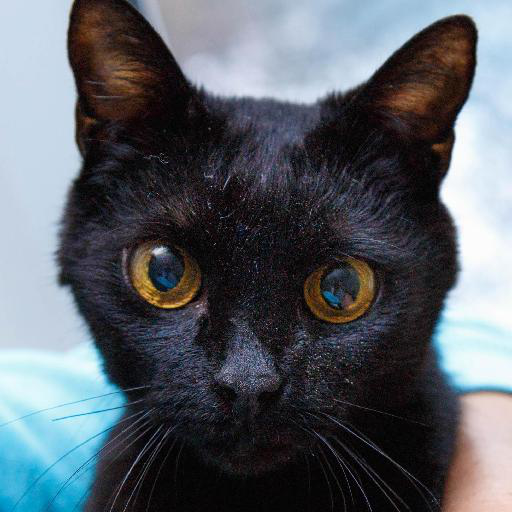

In [4]:
tf.keras.preprocessing.image.load_img('../input/animal-faces/afhq/train/cat/flickr_cat_000013.jpg')

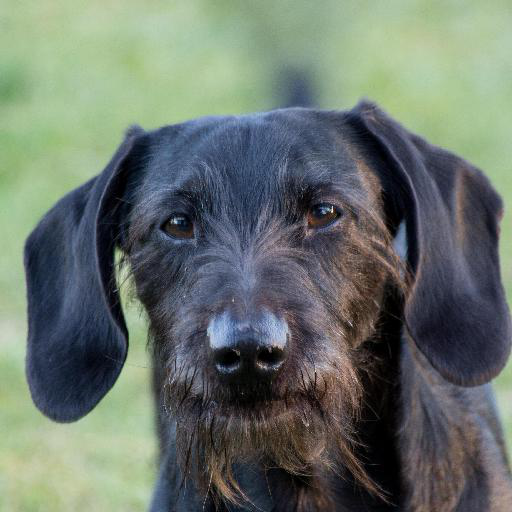

In [5]:
tf.keras.preprocessing.image.load_img('../input/animal-faces/afhq/train/dog/flickr_dog_000015.jpg')

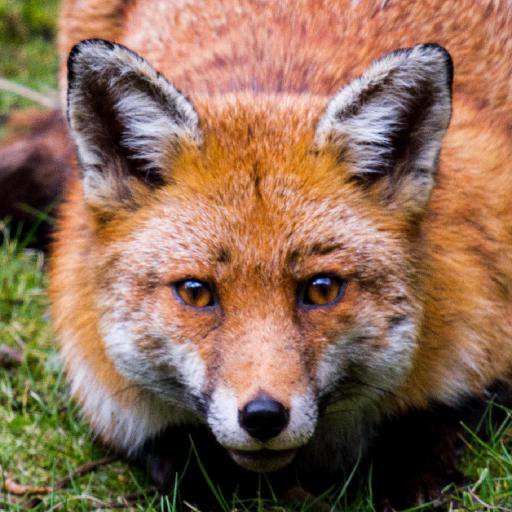

In [6]:
tf.keras.preprocessing.image.load_img('../input/animal-faces/afhq/train/wild/flickr_wild_000019.jpg')

# **Training and Testing Basis**

In [7]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
training_dataset = training_generator.flow_from_directory('../input/animal-faces/afhq/train',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 14630 images belonging to 3 classes.


In [8]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [9]:
training_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [10]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('../input/animal-faces/afhq/val',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1500 images belonging to 3 classes.


# **Construction and training of the neural network**

In [11]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 3, activation='softmax'))

2021-12-03 01:38:49.743767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 01:38:49.870493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 01:38:49.871614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 01:38:49.873428: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 7317)              45899541  
_________________________________________________________________
dense_1 (Dense)              (None, 7317)              5

In [13]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
historic = network.fit(training_dataset, epochs=20)

2021-12-03 01:38:54.168863: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2021-12-03 01:38:56.230999: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


458/458 [==============================] - 220s 465ms/step - loss: 0.5757 - accuracy: 0.7873
Epoch 2/20
458/458 [==============================] - 94s 206ms/step - loss: 0.2965 - accuracy: 0.8887
Epoch 3/20
458/458 [==============================] - 96s 209ms/step - loss: 0.2187 - accuracy: 0.9211
Epoch 4/20
458/458 [==============================] - 96s 211ms/step - loss: 0.1839 - accuracy: 0.9327
Epoch 5/20
458/458 [==============================] - 96s 209ms/step - loss: 0.1676 - accuracy: 0.9388
Epoch 6/20
458/458 [==============================] - 100s 219ms/step - loss: 0.1350 - accuracy: 0.9498
Epoch 7/20
458/458 [==============================] - 100s 218ms/step - loss: 0.1315 - accuracy: 0.9532
Epoch 8/20
458/458 [==============================] - 99s 217ms/step - loss: 0.1152 - accuracy: 0.9582
Epoch 9/20
458/458 [==============================] - 97s 213ms/step - loss: 0.1051 - accuracy: 0.9597
Epoch 10/20
458/458 [==============================] - 97s 211ms/step - loss: 0.0

# **Neural network evaluation**

In [15]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [16]:
forecasts = network.predict(test_dataset)
forecasts

array([[1.0000000e+00, 1.1458239e-22, 2.0278112e-26],
       [1.0000000e+00, 1.0782228e-29, 2.7881638e-37],
       [9.9999988e-01, 1.7433030e-07, 6.1033569e-09],
       ...,
       [1.5900234e-08, 1.8028445e-10, 1.0000000e+00],
       [2.7083489e-20, 1.2986055e-16, 1.0000000e+00],
       [1.0730512e-13, 2.7659538e-11, 1.0000000e+00]], dtype=float32)

In [17]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 2, 2, 2])

In [18]:
test_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, forecasts)

0.97

In [20]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[482,   9,   9],
       [  7, 483,  10],
       [  5,   5, 490]])

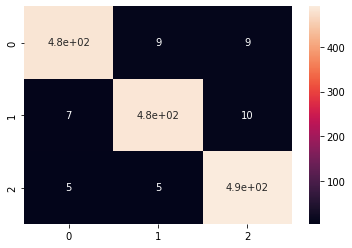

In [22]:
sns.heatmap(cm, annot=True);

In [23]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, forecasts))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       500
           1       0.97      0.97      0.97       500
           2       0.96      0.98      0.97       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



# **Single image classification**

In [24]:
image = cv2.imread('../input/animal-faces/afhq/val/wild/flickr_wild_000099.jpg')

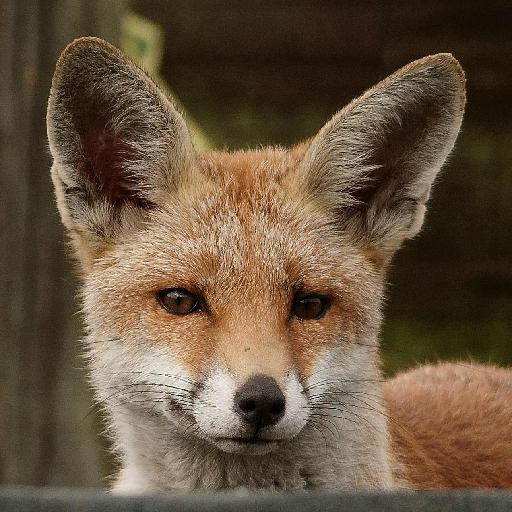

In [25]:
cv2_imshow(image)

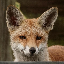

In [26]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [27]:
image = image / 255
image

array([[[0.16078431, 0.22745098, 0.27843137],
        [0.18039216, 0.23921569, 0.27058824],
        [0.12941176, 0.19607843, 0.23137255],
        ...,
        [0.02352941, 0.06666667, 0.09803922],
        [0.02352941, 0.0745098 , 0.10588235],
        [0.02352941, 0.0745098 , 0.10588235]],

       [[0.18039216, 0.24705882, 0.29803922],
        [0.20392157, 0.2627451 , 0.29411765],
        [0.12156863, 0.18823529, 0.22352941],
        ...,
        [0.01176471, 0.05490196, 0.08627451],
        [0.01960784, 0.05098039, 0.08627451],
        [0.02352941, 0.05490196, 0.09019608]],

       [[0.17254902, 0.23921569, 0.29019608],
        [0.17254902, 0.23137255, 0.2627451 ],
        [0.12156863, 0.18039216, 0.21568627],
        ...,
        [0.01176471, 0.05490196, 0.08627451],
        [0.02745098, 0.05098039, 0.08627451],
        [0.02352941, 0.04705882, 0.08235294]],

       ...,

       [[0.3372549 , 0.38039216, 0.38431373],
        [0.36470588, 0.40784314, 0.41176471],
        [0.36078431, 0

In [28]:
image.shape

(64, 64, 3)

In [29]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [30]:
result = network(image)
result

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.00105649, 0.33122596, 0.6677176 ]], dtype=float32)>

In [31]:
result = np.argmax(result)
result

2

In [32]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [33]:
if result == 0:
  print('Cat')
else:
 if result == 1:
    print('Dog')
 else:
    print('Wild')

Wild


# **If you find this notebook useful, support with an upvote** 👍¶¶